In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kattunet2d',
           filter_num=[16, 32, 64, 128, 256],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           atten_activation='ReLU',
           attention='add',
           output_activation='Sigmoid',
           batch_norm=False,
           pool=False,
           unpool=False,
           weights='imagenet',
           optimizer= None, #None = default is optimizers.Adam(learning_rate=1e-3)
           loss=None, #None = default is losses.binary_crossentropy
           metric=None # None = default is Util.dice_coef
          )

*** GP2 KATTUnet2D ***
Working directory: /tmp/tmp4p7vxo_uGP2
Using default discriminator (CNN)


In [4]:
images = np.load('/hpcstor6/scratch01/y/y.shah001/Forest_Segmented/Forest_Segmented/Forest_final_img_unm.npy')
masks = np.load('/hpcstor6/scratch01/y/y.shah001/Forest_Segmented/Forest_Segmented/Forest_final_mask_unm.npy')

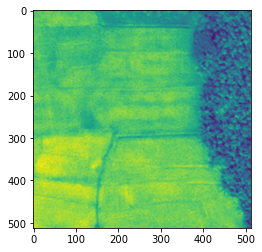

In [5]:
imshow(images[0])

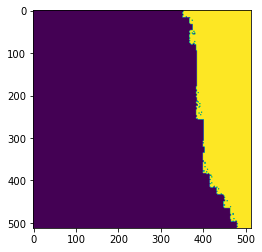

In [6]:
imshow(masks[0])

In [7]:
images = images[:6392]

In [8]:
masks = masks[:6392]

In [9]:
images.shape

(5108, 512, 512, 1)

In [10]:
masks.shape

(5108, 512, 512, 1)

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [12]:
R.run(images=images, masks=masks, weights=weights, runs=7)

Weights OK!
******
Loop 1
Epoch 1/100
4/4 [==============================] - 28s 5s/step - loss: 4.1201 - dice_coeff: 0.0138 - val_loss: 3.5223 - val_dice_coeff: 0.0318
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 3.1161 - dice_coeff: 0.0378 - val_loss: 2.5801 - val_dice_coeff: 0.0743
Epoch 3/100
4/4 [==============================] - 4s 1s/step - loss: 2.2889 - dice_coeff: 0.0874 - val_loss: 1.9621 - val_dice_coeff: 0.1389
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: 1.7283 - dice_coeff: 0.1648 - val_loss: 1.4264 - val_dice_coeff: 0.2411
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 1.2251 - dice_coeff: 0.2860 - val_loss: 0.9813 - val_dice_coeff: 0.3873
Epoch 6/100
4/4 [==============================] - 4s 1s/step - loss: 0.8630 - dice_coeff: 0.4365 - val_loss: 0.7440 - val_dice_coeff: 0.5307
Epoch 7/100
4/4 [==============================] - 4s 1s/step - loss: 0.7345 - dice_coeff: 0.5583 - val_loss: 0.7336 - va

6/6 [==============================] - 5s 893ms/step - loss: 0.5709 - dice_coeff: 0.6940 - val_loss: 0.5460 - val_dice_coeff: 0.6777
Model saved to: /tmp/tmp4p7vxo_uGP2/attunet_3attunet_model
History saved to: /tmp/tmp4p7vxo_uGP2/attunet_history_3.pkl
Testing the classifier...
Testing the discriminator...
10/10 [==============================] - 0s 47ms/step - loss: 4.8313 - accuracy: 0.7745
Replacing 26 from 80 !
D_relabeled_ 26
point ids 26
Removed: 26 Filled: 26
TOOK 180.81271409988403 seconds
==== DONE LOOP 4 ====
******
Loop 5
Epoch 1/100
7/7 [==============================] - 9s 1s/step - loss: 0.5652 - dice_coeff: 0.6984 - val_loss: 0.5288 - val_dice_coeff: 0.7142
Epoch 2/100
7/7 [==============================] - 5s 759ms/step - loss: 0.5600 - dice_coeff: 0.7069 - val_loss: 0.5275 - val_dice_coeff: 0.7078
Epoch 3/100
7/7 [==============================] - 5s 771ms/step - loss: 0.5571 - dice_coeff: 0.6970 - val_loss: 0.5326 - val_dice_coeff: 0.6902
Epoch 4/100
7/7 [=============

In [13]:
R.classifier_scores

[[0.5718413591384888, 0.7048246264457703],
 [0.6184718012809753, 0.7363731265068054],
 [0.542178213596344, 0.7181071639060974],
 [0.5741704702377319, 0.6473395228385925],
 [0.5262694954872131, 0.700816810131073],
 [0.5227348208427429, 0.7004315257072449],
 [0.5146776437759399, 0.7028226852416992]]

In [14]:
R.discriminator_scores

[[0.24415940046310425, 0.983660101890564],
 [8.240056037902832, 0.7712418437004089],
 [2.923488140106201, 0.8888888955116272],
 [1.8001632690429688, 0.9477124214172363],
 [2.8505094051361084, 0.915032684803009],
 [3.684380054473877, 0.8856208920478821],
 [2.2796971797943115, 0.915032684803009]]

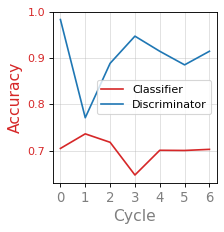

In [15]:
R.plot() #This when I run for the second time

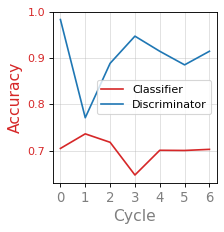

In [16]:
R.plot() #This is when I run for the first time